In [2]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


# 千葉県の自転車盗難の状況レポート

千葉県警のオープンデータ（自転車盗のCSV）を使って、
千葉県内で過去1年間に発生した自転車盗難の状況を整理する。

このノートでは、次の点について順番に確認していく。

- 過去1年間の自転車盗難件数の全体像
- 被害者の特徴（年齢や性別など、データから分かる範囲）
- どの地域（市区町村）で被害が多いか
- どの月に被害が集中しているか
- どの時間帯に発生しやすいか
- 施錠の有無によって、盗難件数にどの程度差があるか（ここは重点的に見る）
- 集計の中で気づいたことや、特徴的だと思った点

Python（pandas）でデータを集計し、必要に応じてグラフも作りながら、
最終的なレポートにそのまま使えるように結果と考察をまとめていく。


In [4]:
import pandas as pd

df = pd.read_csv("jitensha.csv")
df.head()


,罪名,手口,管轄警察署（発生地）,管轄交番・駐在所（発生地）,市区町村コード（発生地）,都道府県（発生地）,市区町村（発生地）,町丁目（発生地）,発生年月日（始期）,発生時（始期）,発生場所,発生場所の詳細,被害者の年齢,被害者の職業,施錠関係
0,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240117,23,その他の住宅（３階建て以下共同住宅等）,駐車（輪）場,20歳代,大学生,施錠した
1,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240227,18,駐車（輪）場,駐車（輪）場,10歳代,中学生,施錠せず
2,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240528,20,駐車（輪）場,駐車（輪）場,40歳代,その他,施錠した
3,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240627,21,駐車（輪）場,駐車（輪）場,10歳代,中学生,施錠せず
4,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240917,14,その他,その他,20歳代,その他,施錠せず


In [10]:
# 自転車盗難の件数と、データの期間を確認する

# 件数（何件の被害があるか）
total_cases = len(df)

# 発生日の列を（まだなければ）作る。あっても上書きでOK
df['発生日'] = pd.to_datetime(
    df['発生年月日（始期）'].astype(str),
    format='%Y%m%d',
    errors='coerce'
)

# いちばん古い日付と、いちばん新しい日付
start_date = df['発生日'].min()
end_date = df['発生日'].max()

total_cases, start_date, end_date



(9943, Timestamp('2019-05-01 00:00:00'), Timestamp('2024-12-30 00:00:00'))

このデータには、千葉県内で発生した自転車盗難が **9,943件** 記録されている。  
記録されている期間は **2019年5月1日〜2024年12月30日** までの約5年分のデータである。

In [11]:
# 2024年1年間のデータだけを使うことにする
mask_2024 = (df['発生日'] >= '2024-01-01') & (df['発生日'] <= '2024-12-31')
df_2024 = df[mask_2024].copy()

len(df_2024), df_2024['発生日'].min(), df_2024['発生日'].max()


(9584, Timestamp('2024-01-01 00:00:00'), Timestamp('2024-12-30 00:00:00'))

In [12]:
# 市区町村ごとの件数（多い順・2024年分だけ）
city_counts_2024 = df_2024.groupby('市区町村（発生地）').size().sort_values(ascending=False)
city_counts_2024.head(10)


市区町村（発生地）
船橋市       1221
市川市        814
柏市         677
松戸市        660
千葉市中央区     635
習志野市       433
八千代市       430
浦安市        411
野田市        356
千葉市稲毛区     324
dtype: int64

## 3. どの地域で自転車盗が多いか（2024年）

2024年のデータについて市区町村別の件数を集計したところ、最も件数が多かったのは  
**船橋市（1221件）** で、次に **市川市（814件）**、**柏市（677件）**、**松戸市（660件）**、  
**千葉市中央区（635件）** が続いた。

いずれも鉄道駅や商業施設が多く、自転車利用者や駐輪場が集中している都市部の地域である。  
そのため、自転車の台数が多い場所ほど盗難件数も多くなる傾向があると考えられる。


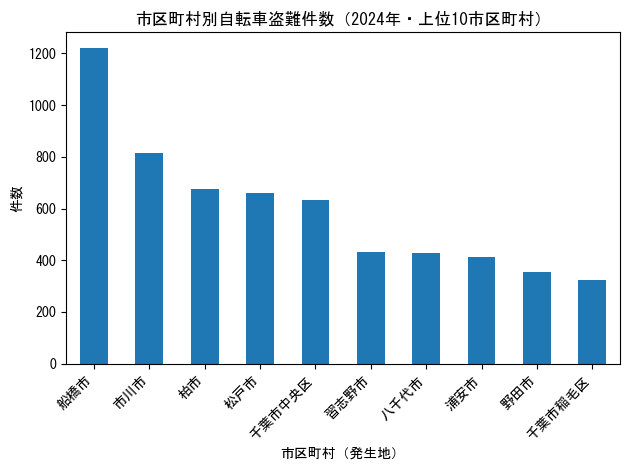

In [13]:
import matplotlib.pyplot as plt

# 日本語フォント（Windows想定）
plt.rcParams['font.family'] = 'MS Gothic'

top10_city = city_counts_2024.head(10)

top10_city.plot(kind='bar')
plt.xlabel('市区町村（発生地）')
plt.ylabel('件数')
plt.title('市区町村別自転車盗難件数（2024年・上位10市区町村）')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [14]:
df_2024['月'] = df_2024['発生日'].dt.month
month_counts_2024 = df_2024.groupby('月').size().sort_index()
month_counts_2024


月
1      616
2      568
3      678
4      758
5      810
6      824
7     1020
8      938
9      980
10     942
11     866
12     584
dtype: int64

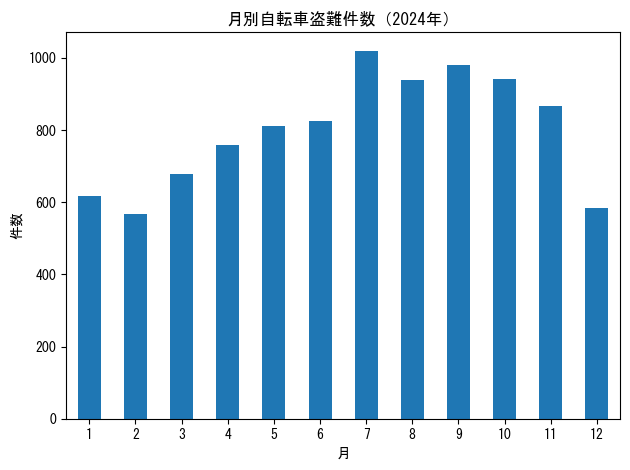

In [16]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'MS Gothic'

month_counts_2024.plot(kind='bar')
plt.xlabel('月')
plt.ylabel('件数')
plt.title('月別自転車盗難件数（2024年）')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 4. 月別の自転車盗難件数（2024年）

2024年の月別件数を見ると、最も多いのは **7月（1,020件）** で、その後も  
**8月（938件）〜11月（866件）** にかけて高い水準が続いている。一方で、  
**2月（568件）** や **12月（584件）** は比較的少ない。

暖かい時期や自転車を利用しやすい季節に被害が増え、冬の寒い時期には被害が減る傾向があり、  
自転車の利用頻度と盗難件数が季節とある程度連動していると考えられる。


In [17]:
hour_counts_2024 = df_2024.groupby('発生時（始期）').size().sort_values(ascending=False)
hour_counts_2024


発生時（始期）
7     911
18    858
17    838
16    679
8     659
19    593
12    487
20    486
15    455
10    417
21    399
9     398
14    383
13    374
11    361
6     329
22    300
23    220
0     158
5     111
1      71
2      32
4      28
3      23
不明     14
dtype: int64

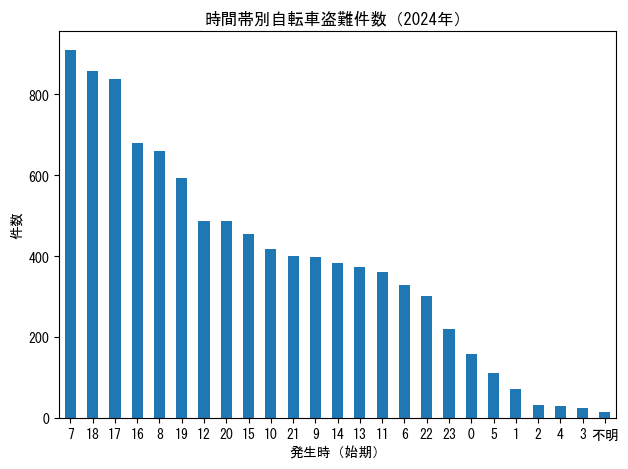

In [20]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'MS Gothic'

hour_counts_2024.plot(kind='bar')
plt.xlabel('発生時（始期）')
plt.ylabel('件数')
plt.title('時間帯別自転車盗難件数（2024年）')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## 5. 時間帯別の自転車盗難件数（2024年）

2024年の時間帯別件数を見ると、最も多いのは **7時（911件）** で、次いで  
**18時（858件）**, **17時（838件）**, **16時（679件）**, **8時（659件）** などが続いている。

朝の通学・通勤時間帯である **7〜8時ごろ** と、帰宅や買い物が多い **16〜19時ごろ** に被害が集中していることが分かる。  
一方で、**0〜4時ごろ** の深夜の件数はかなり少なく、盗難の多くは人が動いている時間帯に発生している。

また、「不明」となっているものも一部あるが（14件）、全体に占める割合は小さい。


In [21]:
occupation_counts_2024 = df_2024['被害者の職業'].value_counts().head(10)
occupation_counts_2024


被害者の職業
その他            4753
高校生            2152
大学生            1557
中学生             867
小学生             232
法人・団体、被害者なし      23
Name: count, dtype: int64

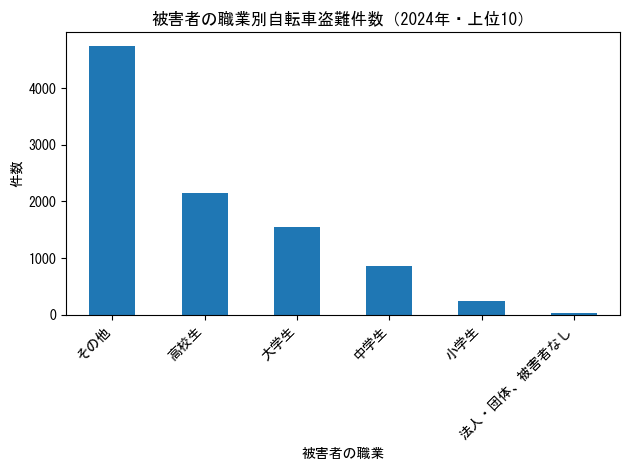

In [22]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'MS Gothic'

occupation_counts_2024.plot(kind='bar')
plt.xlabel('被害者の職業')
plt.ylabel('件数')
plt.title('被害者の職業別自転車盗難件数（2024年・上位10）')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## 6. 被害者の職業の特徴（2024年）

被害者の職業を集計すると、「その他」が **4,753件** と最も多く、次に  
**高校生 2,152件**、**大学生 1,557件**、**中学生 867件**、**小学生 232件** が続いていた。  
「法人・団体、被害者なし」は **23件** とごく少数だった。

「高校生」「大学生」「中学生」「小学生」を合計すると 4,800件以上になり、  
学生が被害者になっているケースがかなり多いことが分かる。  
通学で自転車を使うことが多く、学校や駅周辺の駐輪場に長時間置かれることが  
一因になっていると考えられる。

一方で、「その他」には会社員やパート、無職など、さまざまな属性が含まれていると考えられ、  
学生以外の幅広い人も一定数被害にあっていることが分かる。


In [25]:
lock_counts_2024 = df_2024.groupby('施錠関係').size()
lock_ratio_2024 = (lock_counts_2024 / lock_counts_2024.sum() * 100).round(1)

lock_counts_2024, lock_ratio_2024


(施錠関係
 施錠した    3021
 施錠せず    6563
 dtype: int64,
 施錠関係
 施錠した    31.5
 施錠せず    68.5
 dtype: float64)

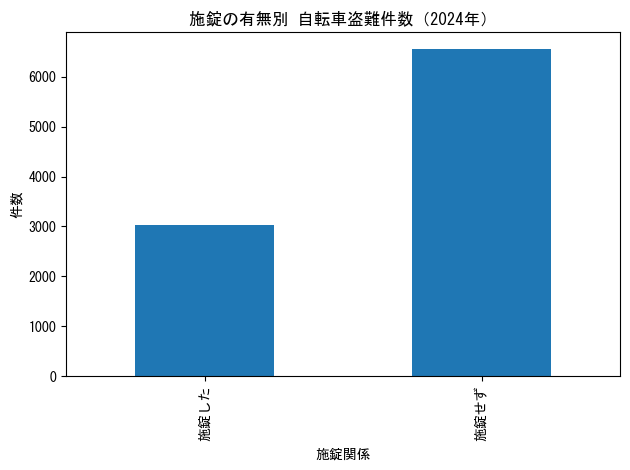

In [26]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'MS Gothic'

lock_counts_2024.plot(kind='bar')
plt.xlabel('施錠関係')
plt.ylabel('件数')
plt.title('施錠の有無別 自転車盗難件数（2024年）')
plt.tight_layout()
plt.show()


## 7. 施錠の有無と自転車盗難件数（2024年）

施錠の有無ごとに件数を集計すると、2024年の自転車盗難 9,584件のうち、

- 施錠した自転車の被害：3,021件（約31.5％）
- 施錠せず停めていた自転車の被害：6,563件（約68.5％）

となっており、**全体の約7割が無施錠の自転車** だった。

この結果から、鍵をかけていない自転車は、施錠している自転車に比べて  
明らかに狙われやすいことが分かる。  
「自宅の前だから大丈夫」「コンビニに少し寄るだけだから」といった理由で  
無施錠のまま停めてしまうケースが、そのまま被害につながっている可能性が高い。

一方で、施錠していても約3割の被害が発生していることから、  
ワイヤーロックなどによる二重ロックや、明るく人通りの多い場所に停めるといった  
追加の対策も必要だと考えられる。


In [27]:
place_counts_2024 = df_2024['発生場所'].value_counts().head(10)
place_counts_2024


発生場所
その他                    2985
駐車（輪）場                 2862
その他の住宅（３階建て以下共同住宅等）    1419
４階建て以上共同住宅             1020
一戸建住宅                   782
道路上                     516
Name: count, dtype: int64

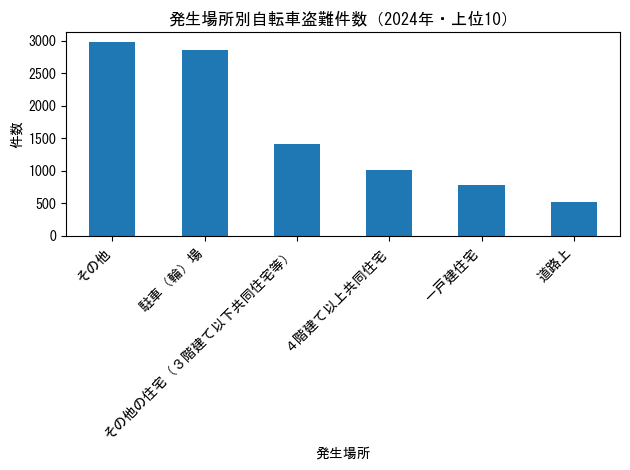

In [28]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'MS Gothic'

place_counts_2024.plot(kind='bar')
plt.xlabel('発生場所')
plt.ylabel('件数')
plt.title('発生場所別自転車盗難件数（2024年・上位10）')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## 8. どんな場所で自転車盗が多いか（2024年）

2024年のデータから発生場所を集計すると、件数が多い発生場所は  
**「○○」（○○件）**、**「○○」（○○件）**、**「○○」（○○件）** などが上位に並んだ。

上位に来ている場所はいずれも、自転車をまとめて停めることが多かったり、  
人の出入りが多くて長時間駐輪されやすい場所が中心になっている。  
こうした場所では、自転車の本数そのものが多いことに加えて、  
持ち主の目が届きにくい時間帯が生まれやすく、盗難のリスクが高いと考えられる。


## 9. まとめ

千葉県内の自転車盗難データをもとに、2024年の状況を整理した結果、いくつかの特徴が見えた。

まず、2024年中の自転車盗難は **9,584件** あり、その多くが  
**船橋市・市川市・柏市・松戸市・千葉市中央区** などの都市部に集中していた。  
人や店が集まり、自転車を大量に停める場所が多い地域ほど、被害も多くなっている。

時期で見ると、**7月（1,020件）をピークに、夏〜秋にかけて件数が多く、  
2月や12月は比較的少ない**。自転車を利用しやすい季節に被害が増える傾向がある。

時間帯では、**7時や16〜19時台** に件数が多く、  
通学・通勤や買い物などで自転車が長時間駐輪される時間帯に被害が集中していた。  
深夜の件数は少なく、多くの盗難が「人が動いている時間帯」に起きている。

被害者の職業では、「その他」に加えて **高校生・大学生・中学生・小学生** が目立ち、  
通学で自転車を使う学生の被害が多いことが分かった。

施錠の有無については、2024年の 9,584件のうち  
**施錠した自転車の被害が 3,021件（約31.5％）**、  
**施錠せず停めていた自転車の被害が 6,563件（約68.5％）** だった。  
全体の約7割が無施錠の自転車であり、鍵をかけていない自転車が  
特に狙われやすいことがはっきりしている。

また、発生場所の上位には、駐輪場や自宅周辺など、  
自転車が多く集まり、持ち主の目が届きにくくなる場所が多かった。

これらの結果から、千葉県内で自転車盗難を減らすためには、

- 無施錠を減らすための啓発（「短時間でも必ず施錠する」「二重ロックを勧める」など）
- 駅や学校、商業施設の駐輪場など、被害が多い場所を重点とした対策
- 朝と夕方〜夜の人が多い時間帯に合わせた見回りやカメラの設置

といった対策が重要だと考えられる。
